DATASET LINK : https://docs.google.com/spreadsheets/d/1oQUVJdbbFB3COXG4pFg4MLstqQpSjHohlE0__uXBcAA/edit?usp=sharing

# DATA PREPROCESSING

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/heart_disease.csv")
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   int64  
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  Heart_ stroke    4238 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 529.9 KB


In [ ]:
def summary(df):
    print('data shape: ',df.shape)
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    summ['fourth value'] = df.loc[1].values
    summ['fifth value'] = df.loc[2].values

    return summ

In [ ]:
summary(df)

data shape:  (4238, 16)


,data type,missing,%missing,unique,min,max,first value,second value,third value,fourth value,fifth value
Gender,object,0,0.000000,2,NaN,NaN,Male,Female,Male,Female,Male
age,int64,0,0.000000,39,32.0,70.0,39,46,48,46,48
education,object,105,0.024776,4,NaN,NaN,postgraduate,primaryschool,uneducated,primaryschool,uneducated
currentSmoker,int64,0,0.000000,2,0.0,1.0,0,0,1,0,1
cigsPerDay,float64,29,0.006843,33,0.0,70.0,0.0,0.0,20.0,0.0,20.0
BPMeds,float64,53,0.012506,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
prevalentStroke,object,0,0.000000,2,NaN,NaN,no,no,no,no,no
prevalentHyp,int64,0,0.000000,2,0.0,1.0,0,0,0,0,0
diabetes,int64,0,0.000000,2,0.0,1.0,0,0,0,0,0
totChol,float64,50,0.011798,248,107.0,696.0,195.0,250.0,245.0,250.0,245.0


# EDA

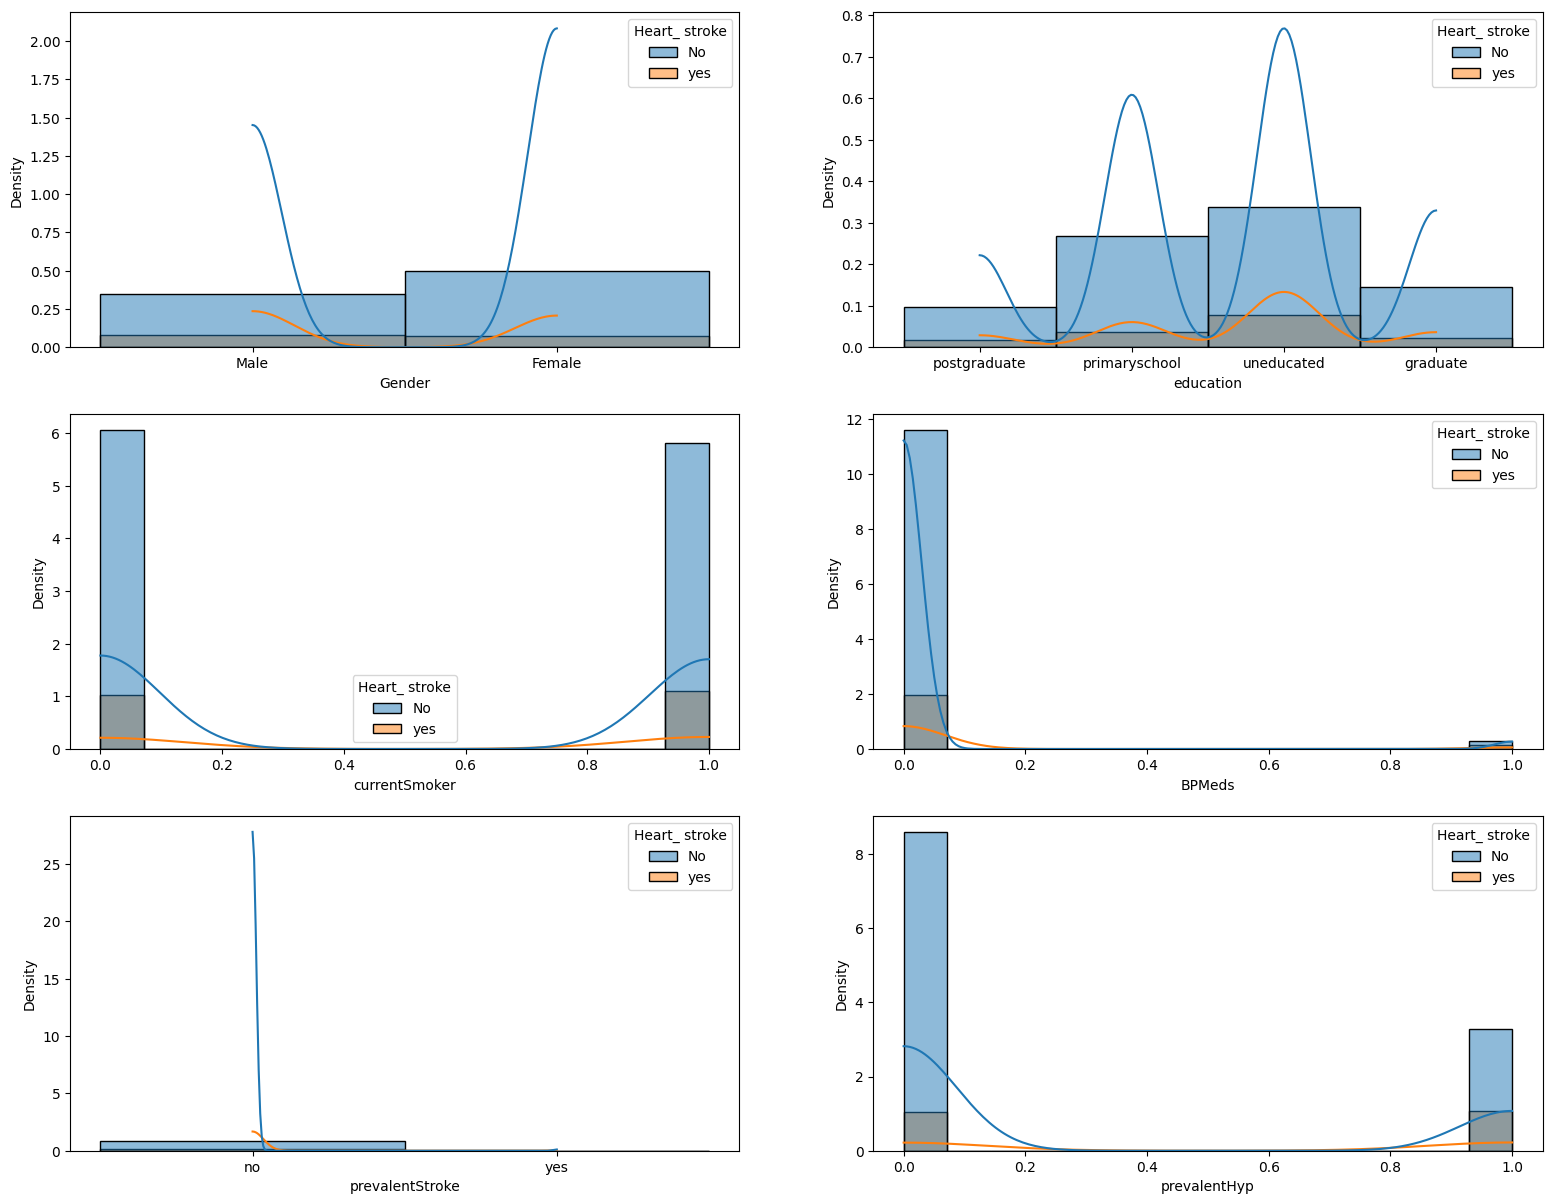

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
hist = ['Gender','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp']
plt.figure(figsize=(19,20))
for i in range(0,len(hist)):
    plt.subplot(4,2,i+1)
    sns.histplot(data=df, x=hist[i], hue='Heart_ stroke',kde=True, stat="density")
    if i == 5:
        plt.show()

<Axes: xlabel='cigsPerDay', ylabel='age'>

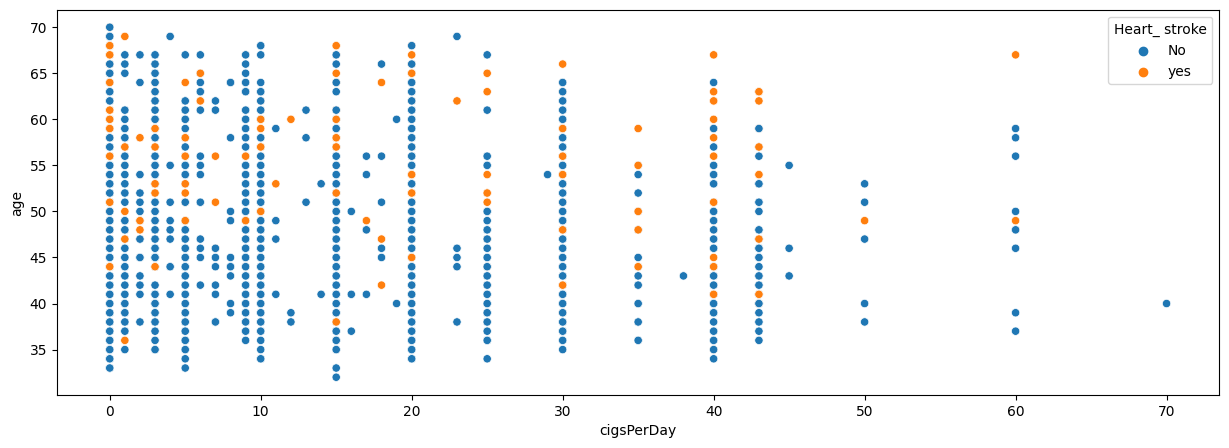

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='cigsPerDay', y='age', hue='Heart_ stroke')

In [ ]:
def kde_plot(index):
    facet = sns.FacetGrid(df, hue='Heart_ stroke',aspect=4)
    facet.map(sns.kdeplot,index,fill= True)
    facet.set(xlim=(0, df[index].max()))
    facet.add_legend()
    plt.show()

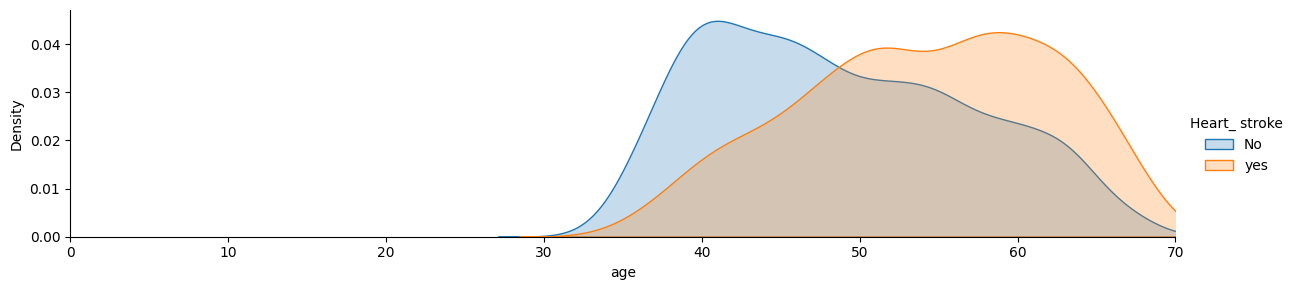

In [ ]:
kde_plot('age')

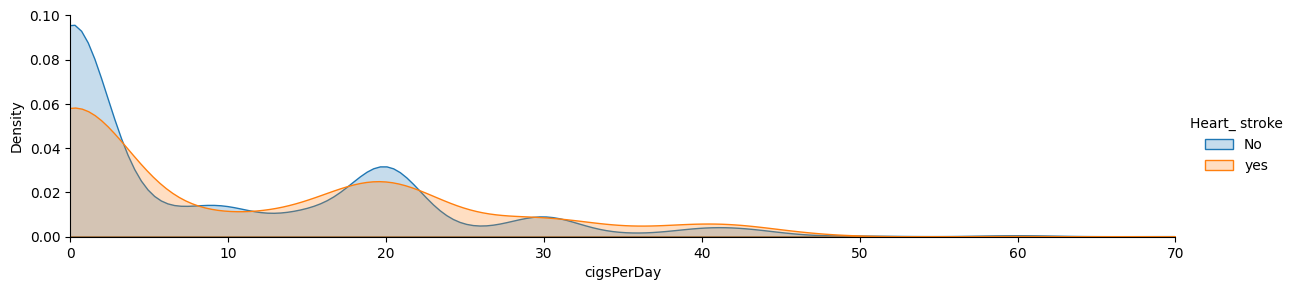

In [ ]:
kde_plot('cigsPerDay')

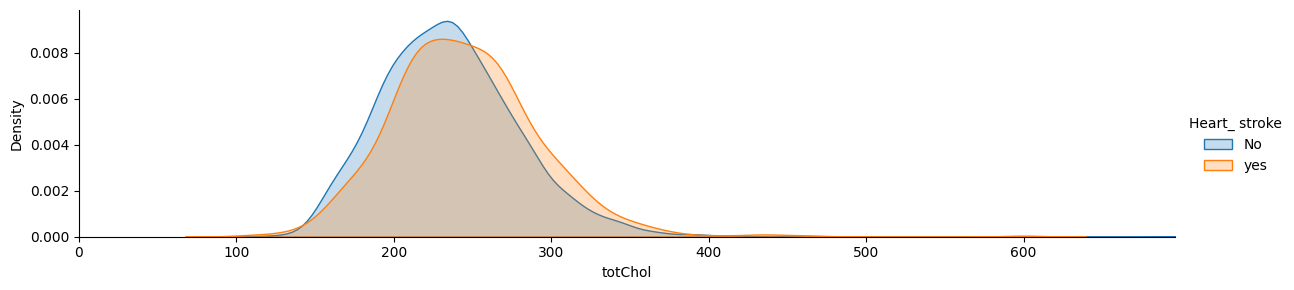

In [ ]:
kde_plot('totChol')

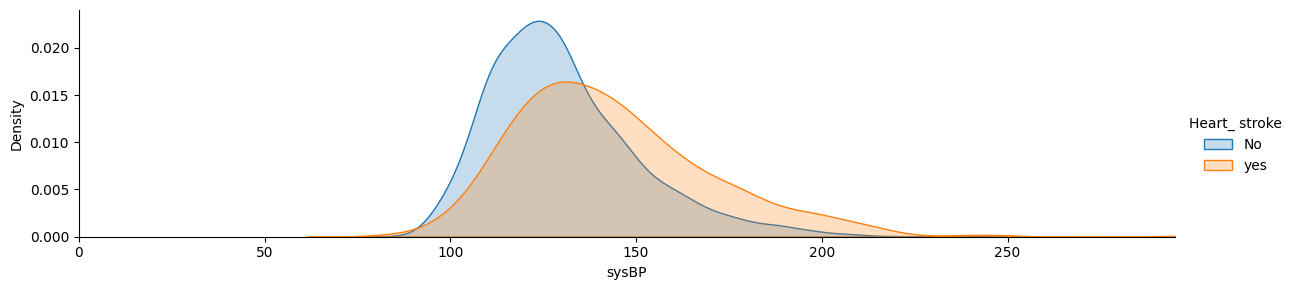

In [ ]:
kde_plot('sysBP')

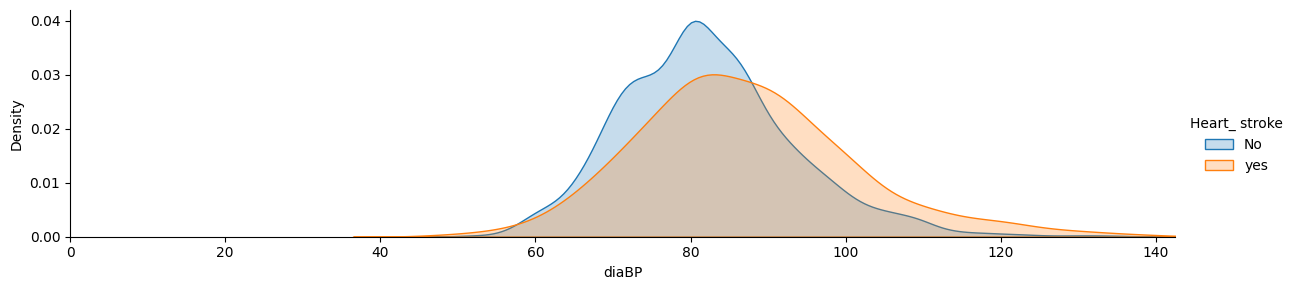

In [ ]:
kde_plot('diaBP')

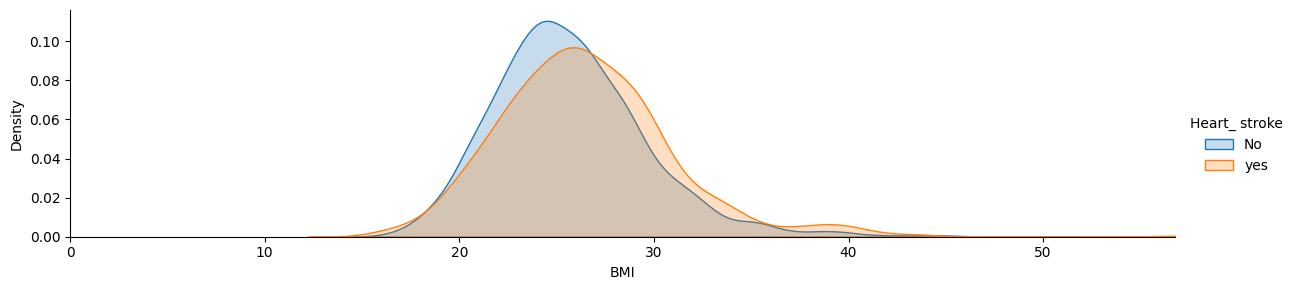

In [ ]:
kde_plot('BMI')

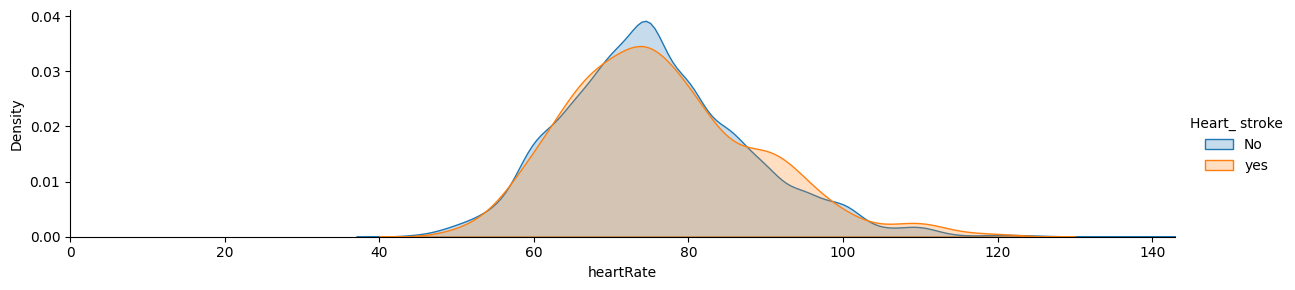

In [ ]:
kde_plot('heartRate')

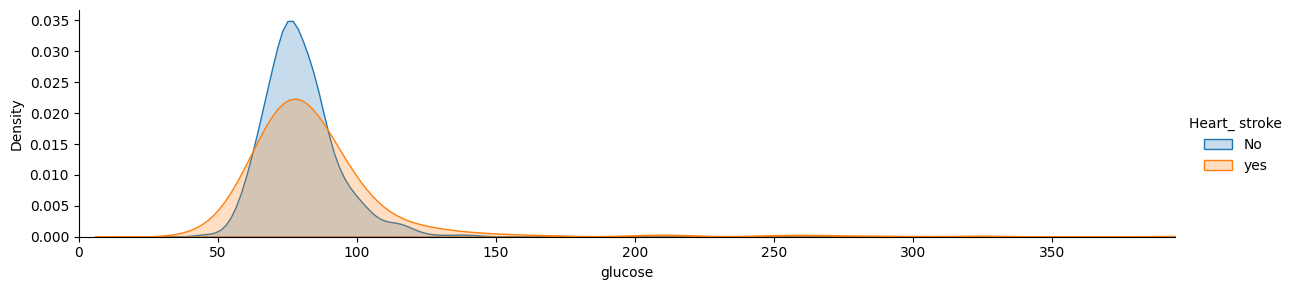

In [ ]:
kde_plot('glucose')

In [ ]:
import numpy as np
smoker = []
for j in range(0,len(df)):
    if df['currentSmoker'][j] > 0:
        smoker.append(df['cigsPerDay'][j])
smoker = pd.DataFrame(data=smoker, columns = ['cigsPerDay'])
print(np.mean(smoker))

cigsPerDay    18.350605
dtype: float64


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# MATH

In [ ]:
import math
df['education'].replace(np.nan, 'uneducated', inplace=True)
df['cigsPerDay'].replace(np.nan, 18, inplace=True)
df['BPMeds'].replace(np.nan, 0, inplace=True)
df['totChol'].replace(np.nan, math.ceil(np.mean(df['totChol'])), inplace=True)
df['BMI'].replace(np.nan, np.mean(df['BMI']), inplace=True)
df['heartRate'].replace(np.nan, math.ceil(np.mean(df['heartRate'])), inplace=True)
df['glucose'].replace(np.nan, math.ceil(np.mean(df['glucose'])), inplace=True)

In [ ]:
summary(df)

data shape:  (4238, 16)


,data type,missing,%missing,unique,min,max,first value,second value,third value,fourth value,fifth value
Gender,object,0,0.0,2,NaN,NaN,Male,Female,Male,Female,Male
age,int64,0,0.0,39,32.0,70.0,39,46,48,46,48
education,object,0,0.0,4,NaN,NaN,postgraduate,primaryschool,uneducated,primaryschool,uneducated
currentSmoker,int64,0,0.0,2,0.0,1.0,0,0,1,0,1
cigsPerDay,float64,0,0.0,33,0.0,70.0,0.0,0.0,20.0,0.0,20.0
BPMeds,float64,0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
prevalentStroke,object,0,0.0,2,NaN,NaN,no,no,no,no,no
prevalentHyp,int64,0,0.0,2,0.0,1.0,0,0,0,0,0
diabetes,int64,0,0.0,2,0.0,1.0,0,0,0,0,0
totChol,float64,0,0.0,248,107.0,696.0,195.0,250.0,245.0,250.0,245.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['education'] = le.fit_transform(df['education'])
df['prevalentStroke'] = le.fit_transform(df['prevalentStroke'])
df['Heart_ stroke'] = le.fit_transform(df['Heart_ stroke'])
le

In [ ]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,3,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
X = df.drop(['Heart_ stroke'], axis=1)
y = df['Heart_ stroke']

In [ ]:
X.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,3,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heart_ stroke, dtype: int64

<Axes: >

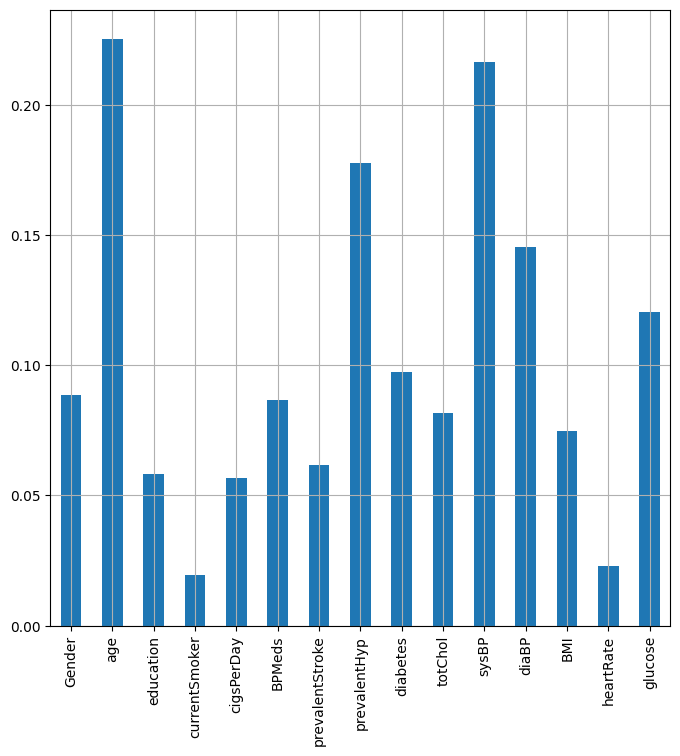

In [ ]:
X.corrwith(y).plot.bar(figsize = (8,8), rot = 90, grid = True)

In [ ]:
X.corr(method ='pearson')

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
Gender,1.000000,-0.028979,0.050436,0.197596,0.316750,-0.051545,-0.004546,0.005313,0.015708,-0.070017,-0.035989,0.057933,0.081506,-0.116599,0.005782
age,-0.028979,1.000000,0.151097,-0.213748,-0.192137,0.120955,0.057655,0.307194,0.101258,0.260287,0.394302,0.206104,0.135283,-0.012815,0.116841
education,0.050436,0.151097,1.000000,-0.007409,0.006204,0.012374,0.025781,0.081240,0.036291,0.017360,0.118153,0.067395,0.146768,0.026084,0.025090
currentSmoker,0.197596,-0.213748,-0.007409,1.000000,0.770714,-0.048358,-0.032988,-0.103260,-0.044295,-0.046266,-0.130230,-0.107746,-0.167276,0.062350,-0.054148
cigsPerDay,0.316750,-0.192137,0.006204,0.770714,1.000000,-0.046472,-0.033041,-0.066592,-0.037832,-0.025117,-0.088290,-0.055876,-0.092214,0.075545,-0.055305
BPMeds,-0.051545,0.120955,0.012374,-0.048358,-0.046472,1.000000,0.114609,0.258697,0.051394,0.078725,0.251503,0.192356,0.099647,0.015139,0.048854
prevalentStroke,-0.004546,0.057655,0.025781,-0.032988,-0.033041,0.114609,1.000000,0.074830,0.006949,0.000061,0.057009,0.045190,0.024840,-0.017676,0.018049
prevalentHyp,0.005313,0.307194,0.081240,-0.103260,-0.066592,0.258697,0.074830,1.000000,0.077808,0.163039,0.696755,0.615751,0.300572,0.147226,0.082918
diabetes,0.015708,0.101258,0.036291,-0.044295,-0.037832,0.051394,0.006949,0.077808,1.000000,0.040089,0.111283,0.050329,0.086250,0.048993,0.605692
totChol,-0.070017,0.260287,0.017360,-0.046266,-0.025117,0.078725,0.000061,0.163039,0.040089,1.000000,0.207618,0.163904,0.114799,0.090689,0.044580


<Axes: >

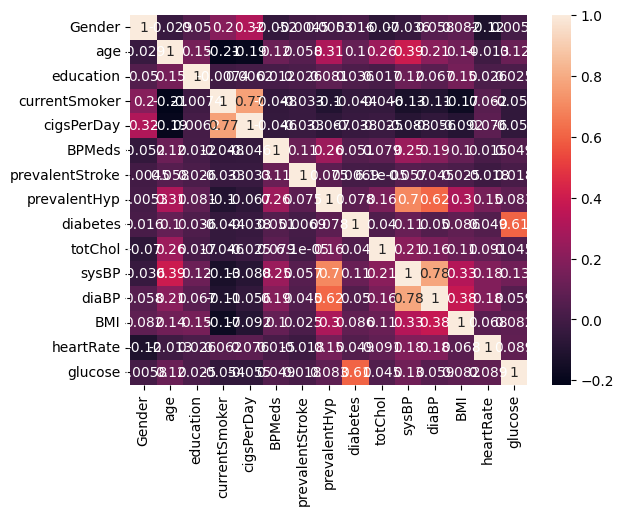

In [ ]:
sns.heatmap(X.corr(), annot=True)

# Decomposition[Train , Test and Fit]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
acc = accuracy_score(y_test1,pred1)
print('Accuracy % : ', acc*100)

Accuracy % :  83.60849056603774


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the model
precision = precision_score(y_test, y_pred)

# Calculate the recall of the model
recall = recall_score(y_test, y_pred)

# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.839622641509434
Precision: 0.6666666666666666
Recall: 0.028985507246376812
F1 score: 0.05555555555555555


# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(learning_rate=0.1, n_estimators=250, random_state=42).fit(X_train,y_train)
pred = classifier.predict(X_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(learning_rate=0.1, n_estimators=250, random_state=42).fit(X_train1,y_train1)
pred1 = classifier.predict(X_test1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
acc = accuracy_score(y_test,pred)
print('Accuracy % : ', acc*100)

Accuracy % :  84.31603773584906


# disp.plot()

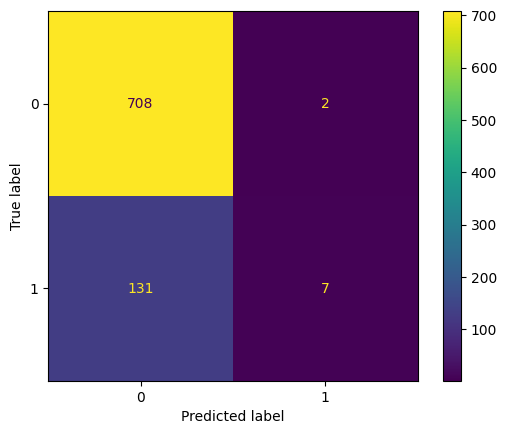

In [ ]:
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

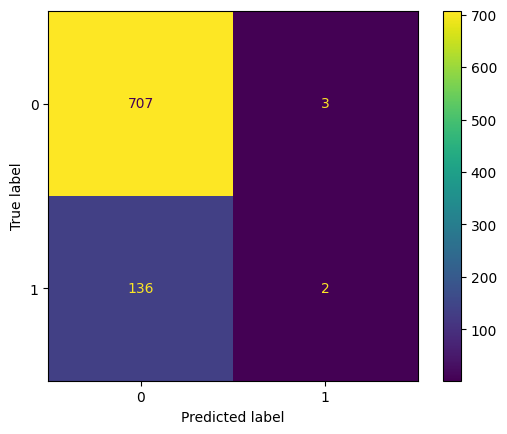

In [ ]:
cm = confusion_matrix(y_test1,pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()